In [574]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

In [575]:
# %matplotlib notebook

In [576]:
mouse_df = pd.read_csv("./data/Mouse_metadata.csv")
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [577]:
results_df = pd.read_csv("./data/Study_results.csv")
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [578]:
comb_data = pd.merge(results_df, mouse_df, how="left", on="Mouse ID")

In [579]:
comb_data.drop_duplicates(subset=["Timepoint"]).groupby("Mouse ID")
comb_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [580]:
comb_data['Mouse ID'].nunique()

249

In [581]:
comb_data.loc[comb_data['Mouse ID'] == ("g989")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [582]:
newc=comb_data.drop([137])
newc

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [583]:
newc['Mouse ID'].nunique()

249

## Summary Statistics

In [584]:
#find avg tumor
avg_tum=newc.groupby('Drug Regimen').mean()
pd.DataFrame(avg_tum)

#create df 
avg_tum_tv=avg_tum['Tumor Volume (mm3)']
avg_tum_df=pd.DataFrame(avg_tum_tv)
avg_tum_df

#rename columns
cavg_tum_df=avg_tum_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
pd.DataFrame(cavg_tum_df)

#find median tumor
med_tum=newc.groupby('Drug Regimen').median()
pd.DataFrame(med_tum)

#create df 
med_tum_tv=med_tum['Tumor Volume (mm3)']
med_tum_df=pd.DataFrame(med_tum_tv)

#change column names
cmed_tum_df=med_tum_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
pd.DataFrame(cmed_tum_df)

#merge mean and median tables
study_data_complete = pd.merge(cavg_tum_df, cmed_tum_df, how="left", on="Drug Regimen")
study_data_complete

###

#find tumor variance
var_tum=newc.groupby('Drug Regimen').var()
pd.DataFrame(var_tum)

#create df 
var_tum_tv=var_tum['Tumor Volume (mm3)']
var_tum_df=pd.DataFrame(var_tum_tv)
var_tum_df

#rename column
cvar_tum_df=var_tum_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
pd.DataFrame(cvar_tum_df)

#merge tables
study_data_complete1 = pd.merge(study_data_complete, cvar_tum_df, how="left", on="Drug Regimen")
study_data_complete1

###

#find tumor standard deviation
std_tum=newc.groupby('Drug Regimen').std()
pd.DataFrame(std_tum)

#create df 
std_tum_tv=std_tum['Tumor Volume (mm3)']
std_tum_df=pd.DataFrame(std_tum_tv)
std_tum_df

#rename column
cstd_tum_df=std_tum_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume St. Dev."})
pd.DataFrame(cstd_tum_df)

#merge tables
study_data_complete2 = pd.merge(study_data_complete1, cstd_tum_df, how="left", on="Drug Regimen")
study_data_complete2

###

#find tumor standard error
stderr_tum=newc.groupby('Drug Regimen').sem()
pd.DataFrame(stderr_tum)

#create df 
stderr_tum_tv=stderr_tum['Tumor Volume (mm3)']
stderr_tum_df=pd.DataFrame(stderr_tum_tv)

#rename column
cstderr_tum_df=stderr_tum_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume St. Error"})
pd.DataFrame(cstderr_tum_df)

#merge tables
study_data_complete3 = pd.merge(study_data_complete2, cstderr_tum_df, how="left", on="Drug Regimen")
study_data_complete3

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [585]:
comb_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [586]:
drug_group = comb_data.groupby('Drug Regimen')

# Count how many times each maker appears in our group
count_drugs = drug_group['Drug Regimen'].count()

count_drugs_df=pd.DataFrame(count_drugs)
count_drugs_df

,Drug Regimen
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [635]:
count_drugs_df.plot.bar()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


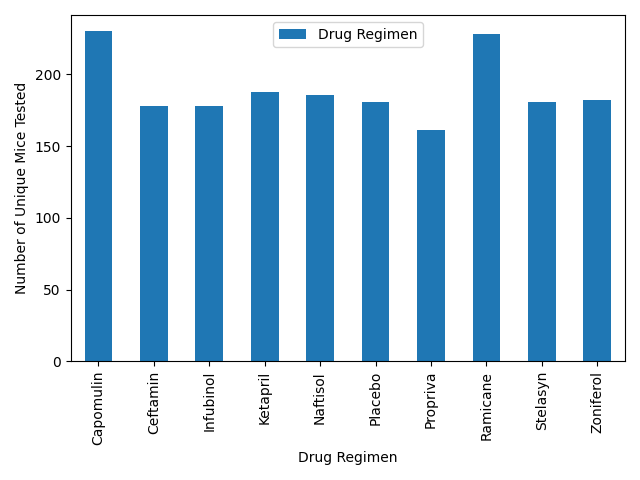

In [634]:
# Create a bar chart based off of the group series from before
count_chart = count_drugs_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Unique Mice Tested")


plt.show()
plt.tight_layout()

In [589]:
sex_group = comb_data.groupby('Sex')

# Count how many times each maker appears in our group
count_sex = sex_group['Sex'].count()

count_sex_df=pd.DataFrame(count_sex)
count_sex_df

,Sex
Sex,
Female,935
Male,958


In [633]:
plot = count_sex_df.plot.pie(y='Sex', figsize=(5, 5))
plt.show()

<IPython.core.display.Javascript object>

In [591]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [935, 958]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)

<IPython.core.display.Javascript object>


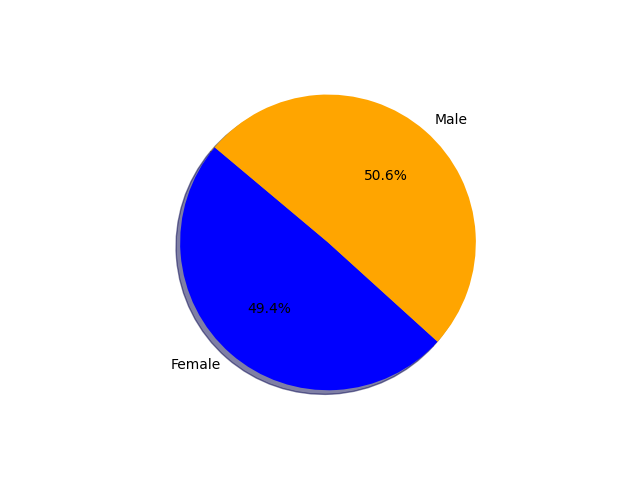

In [632]:
fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles and Boxplots

In [593]:
df = newc.reset_index()
df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,f932,0,45.000000,0,Ketapril,Male,15,29
2,2,g107,0,45.000000,0,Ketapril,Female,2,29
3,3,a457,0,45.000000,0,Ketapril,Female,11,30
4,4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...
1887,1888,r944,45,41.581521,2,Capomulin,Male,12,25
1888,1889,u364,45,31.023923,3,Capomulin,Male,18,17
1889,1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1890,1891,x773,45,58.634971,4,Placebo,Female,21,30


In [594]:
grouped_df11 = newc.groupby("Mouse ID").max('Tumor Volume (mm3)')
grouped_df11

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
a203,45,67.973419,2,20,23
a251,45,65.525743,1,21,25
a262,45,70.717621,4,17,29
a275,45,62.999356,3,20,28
a366,30,63.440686,1,16,29
...,...,...,...,...,...
z435,10,48.710661,0,12,26
z578,45,45.000000,0,11,16
z581,45,62.754451,3,24,25


In [595]:
study_data_complete21 = pd.merge(df, grouped_df11, how="left", on="Weight (g)")
study_data_complete21

,index,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen,Sex,Age_months_x,Weight (g),Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Age_months_y
0,0,b128,0,45.000000,0,Capomulin,Female,9,22,45,45.466677,1,3
1,0,b128,0,45.000000,0,Capomulin,Female,9,22,45,45.651331,2,9
2,0,b128,0,45.000000,0,Capomulin,Female,9,22,45,46.809225,2,22
3,1,f932,0,45.000000,0,Ketapril,Male,15,29,45,70.717621,4,17
4,1,f932,0,45.000000,0,Ketapril,Male,15,29,30,63.440686,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53196,1892,b879,45,72.555239,2,Stelasyn,Female,4,26,25,52.600270,2,8
53197,1892,b879,45,72.555239,2,Stelasyn,Female,4,26,5,49.453270,0,1
53198,1892,b879,45,72.555239,2,Stelasyn,Female,4,26,25,53.726101,0,13
53199,1892,b879,45,72.555239,2,Stelasyn,Female,4,26,45,64.729837,3,23


In [596]:
# study_data_complete21.filter('Drug Regimen'==['Capomulin', 'Ketapril'])
study_data_complete21.dtypes

index                     int64
Mouse ID                 object
Timepoint_x               int64
Tumor Volume (mm3)_x    float64
Metastatic Sites_x        int64
Drug Regimen             object
Sex                      object
Age_months_x              int64
Weight (g)                int64
Timepoint_y               int64
Tumor Volume (mm3)_y    float64
Metastatic Sites_y        int64
Age_months_y              int64
dtype: object

In [597]:
quartiles = grouped_df11['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 46.91089166
The upper quartile of tumor volume is: 64.95756185
The interquartile range of tumor volume is: 18.046670190000007
The the median of tumor volume is: 55.84141007 
Values below 19.840886374999986 could be outliers.
Values above 92.02756713500001 could be outliers.


<IPython.core.display.Javascript object>


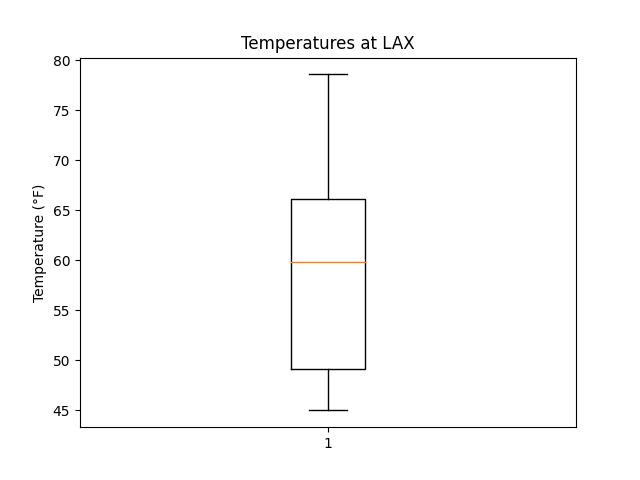

In [638]:
# The second example again looks at the LAX temperature data set and computes quantiles
# temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = study_data_complete21['Tumor Volume (mm3)_y']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

## Line and Scatter Plots

In [599]:
aa=study_data_complete21.loc[study_data_complete21['Mouse ID'] == ("l509")]
aa.rename(columns={'Tumor Volume (mm3)_x':'Tumor_Volume_mm3_x'})
bb=aa.loc[:, ['Timepoint_x','Tumor Volume (mm3)_x']]
bb

,Timepoint_x,Tumor Volume (mm3)_x
7146,0,45.000000
7147,0,45.000000
7148,0,45.000000
7149,0,45.000000
7150,0,45.000000
...,...,...
50041,45,41.483008
50042,45,41.483008
50043,45,41.483008
50044,45,41.483008


In [600]:
cc=bb.set_index("Timepoint_x")
cc

,Tumor Volume (mm3)_x
Timepoint_x,
0,45.000000
0,45.000000
0,45.000000
0,45.000000
0,45.000000
...,...
45,41.483008
45,41.483008
45,41.483008


In [601]:
dd=cc.sort_values(by=['Timepoint_x'])
dd

,Tumor Volume (mm3)_x
Timepoint_x,
0,45.000000
0,45.000000
0,45.000000
0,45.000000
0,45.000000
...,...
45,41.483008
45,41.483008
45,41.483008


<IPython.core.display.Javascript object>


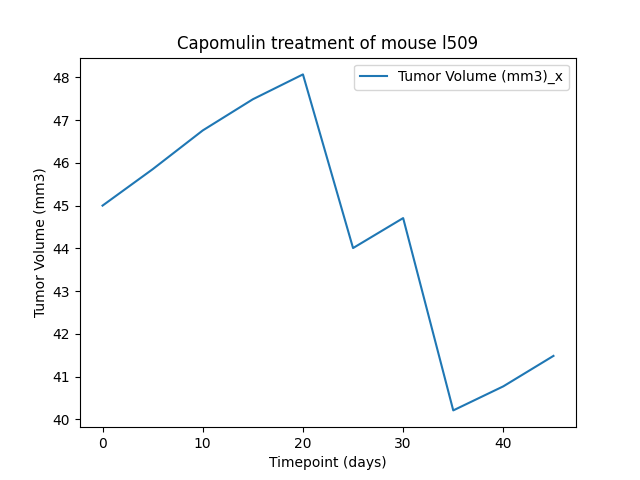

In [631]:
lines = dd.plot.line()
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [617]:
aaa=study_data_complete21.loc[study_data_complete21['Drug Regimen'] == ("Capomulin")]
aaa1=aaa.groupby('Weight (g)').mean('Tumor Volume (mm3)_x')
aaa1

,index,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Age_months_x,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Age_months_y
Weight (g),,,,,,,,,
15,1086.600000,22.500000,36.182040,0.000000,16.000000,45.000000,45.473753,0.000000,16.000000
17,1029.861538,21.538462,37.214133,1.030769,14.769231,42.916667,45.780766,1.166667,10.750000
19,1070.566667,22.500000,41.182391,0.700000,7.666667,45.000000,45.973815,1.166667,8.000000
20,1088.500000,22.500000,39.141053,0.600000,23.000000,40.000000,45.439322,2.000000,18.000000
21,1036.541667,21.666667,42.088700,0.625000,17.458333,42.142857,46.094629,1.571429,17.000000
22,1054.800000,22.500000,43.288490,0.850000,15.500000,45.000000,45.975744,1.666667,11.333333
23,983.695652,20.217391,43.341051,0.521739,6.478261,36.250000,51.532907,1.000000,12.750000
24,1072.600000,22.500000,44.805810,0.200000,1.000000,27.500000,46.368285,0.750000,8.250000
25,917.857143,18.214286,44.062109,0.642857,14.857143,32.638889,57.370664,1.666667,13.361111


In [618]:
bbb=aaa1.loc[:, ['Tumor Volume (mm3)_x']]
bbb

,Tumor Volume (mm3)_x
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109


In [619]:
# ccc=bbb.set_index("Tumor Volume (mm3)_x")
ccc=bbb.reset_index()
ccc

,Weight (g),Tumor Volume (mm3)_x
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [621]:
# ddd=ccc.sort_values(by=['Weight (g)'])
# ddd

In [622]:
x_axis=ddd['Weight (g)']

In [623]:
data=ddd['Tumor Volume (mm3)_x']

In [640]:
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

NameError: name 'linregress' is not defined